In [16]:
import tweepy
import nltk
import json
import os
import pandas as pd
from pmaw import PushshiftAPI
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from twitter_auth import consumer_key, consumer_secret, access_token, access_token_secret
from tweepy.streaming import StreamListener

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

historic_sentiment = pd.read_csv('wallstreetbets_big_df.csv')
historic_sentiment.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\desha\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Unnamed: 0,Comment,Timestamp,Link,Time,Year,Month,Day,Hour,Sentiment
0,0,Enjoy you salty bastard :),1599700428,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:48,2020,9,9,21,0.4019
1,1,"""A red sun rises, blood has been spilled this ...",1599700430,/r/wallstreetbets/comments/ipniz0/hey_if_its_f...,2020-09-09 21:13:50,2020,9,9,21,-0.1761
2,2,this information was not useful to me,1599700430,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:50,2020,9,9,21,-0.3412
3,3,3am “they” are going to buy the shit out of an...,1599700436,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:56,2020,9,9,21,0.6124
4,4,"Nah, you didn’t know. Now you know 😁",1599700437,/r/wallstreetbets/comments/ipnztr/what_are_you...,2020-09-09 21:13:57,2020,9,9,21,-0.1027


In [141]:
user_stock = 'googl'

user_df = historic_sentiment.loc[historic_sentiment['Comment'].str.lower().str.contains(user_stock, na=False)]
user_df.reset_index(inplace=True, drop=True)
user_time_period = ['Year', 'Month', 'Day']
user_df = user_df.groupby(user_time_period).mean('Sentiment')
sentiment_df = pd.Series(user_df['Sentiment'])
sentiment_df = sentiment_df.reset_index()
sentiment_df['Date'] = [f'''{sentiment_df['Year'][i]}-{sentiment_df['Month'][i]}-{sentiment_df['Day'][i]}''' for i in range(len(sentiment_df))]
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.strftime('%Y-%m-%d')
sentiment_df = sentiment_df.set_index('Date')
sentiment_df

,Year,Month,Day,Sentiment
Date,,,,
2020-09-09,2020,9,9,-0.135900
2020-09-10,2020,9,10,0.011500
2020-09-11,2020,9,11,0.112007
2020-09-12,2020,9,12,-0.038306
2020-09-13,2020,9,13,0.071794
2020-09-14,2020,9,14,0.109272
2020-09-15,2020,9,15,0.058496
2020-09-16,2020,9,16,0.158439
2020-09-17,2020,9,17,-0.013761


In [180]:
import yfinance
start_time = f'''{user_df['Sentiment'].index[0][0]}-{user_df['Sentiment'].index[0][1]}-{user_df['Sentiment'].index[0][2]}'''
end_time = f'''{user_df['Sentiment'].index[-1][0]}-{user_df['Sentiment'].index[-1][1]}-{user_df['Sentiment'].index[-1][2]}'''

y_ticker = yfinance.Ticker(user_stock)
close = y_ticker.history(start=start_time, end=end_time, interval='1d')['Close']

close_df = pd.DataFrame(close, columns=['Close'])
close_df = close_df.reset_index()
close_df['Year'] = close_df['Date'].dt.strftime('%Y')
close_df['Month'] = close_df['Date'].dt.strftime('%m')
close_df['Day'] = close_df['Date'].dt.strftime('%d')
close_df_user_time_period = close_df.groupby(user_time_period).mean()
close_df_user_time_period = close_df_user_time_period.reset_index()
close_df_user_time_period['Date'] = [f'''{close_df_user_time_period['Year'][i]}-{close_df_user_time_period['Month'][i]}-{close_df_user_time_period['Day'][i]}''' for i in range(len(close_df_user_time_period))]
close_df_user_time_period = close_df_user_time_period.set_index('Date')
close_df_user_time_period['Pct Change'] = close_df_user_time_period['Close'].pct_change()
close_df_user_time_period = close_df_user_time_period.dropna()
close_df_user_time_period

,Year,Month,Day,Close,Pct Change
Date,,,,,
2020-09-10,2020,09,10,1526.050049,-0.013689
2020-09-11,2020,09,11,1515.760010,-0.006743
2020-09-14,2020,09,14,1508.829956,-0.004572
2020-09-15,2020,09,15,1535.119995,0.017424
2020-09-16,2020,09,16,1512.089966,-0.015002
2020-09-17,2020,09,17,1487.040039,-0.016566
2020-09-18,2020,09,18,1451.089966,-0.024176
2020-09-21,2020,09,21,1430.140015,-0.014437
2020-09-22,2020,09,22,1459.819946,0.020753


In [183]:
pd.set_option('display.max_rows', None)

sentiment_df = sentiment_df.loc[sentiment_df.index.isin(close_df_user_time_period.index)]
sentiment_df = sentiment_df.dropna()
close_df_user_time_period = close_df_user_time_period.loc[close_df_user_time_period.index.isin(sentiment_df.index)]
X = sentiment_df['Sentiment'].to_numpy().reshape(-1, 1)
y = close_df_user_time_period['Pct Change']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression model R2:', lr.score(X_test, y_test))

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
forest_param = [{'max_depth':list(range(10, 20))}]

forest_rgr = GridSearchCV(rf, forest_param, cv=5, scoring='r2')
forest_rgr.fit(X_train, y_train)

print('Random Forest model R2:', forest_rgr.best_score_)

from sklearn.linear_model import BayesianRidge

br = BayesianRidge()
br_params = [{'n_iter':[1, 5, 10, 15, 20]}]
br_rgr = GridSearchCV(br, br_params, cv=5, scoring='r2')
br_rgr.fit(X_train, y_train)

print('Bayesian Ridge model R2:', br_rgr.best_score_)

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_params = [{'learning_rate':[0.0001, 0.001, 0.01, 0.1], 'n_estimators':[50, 100, 200], 'criterion':['friedman_mse', 'mse']}]
gb_rgr = GridSearchCV(gb, gb_params, cv=5, scoring='r2')
gb_rgr.fit(X_train, y_train)

print('Gradient Boosting model R2:', gb_rgr.best_score_)
sentiment = []

Linear Regression model R2: -0.029435989675437035
Random Forest model R2: -0.48294381878442516
Bayesian Ridge model R2: -0.019300531149485066
Gradient Boosting model R2: -0.01464625380401996


Connected to Twitter API.
[*********************100%***********************]  1 of 1 completed


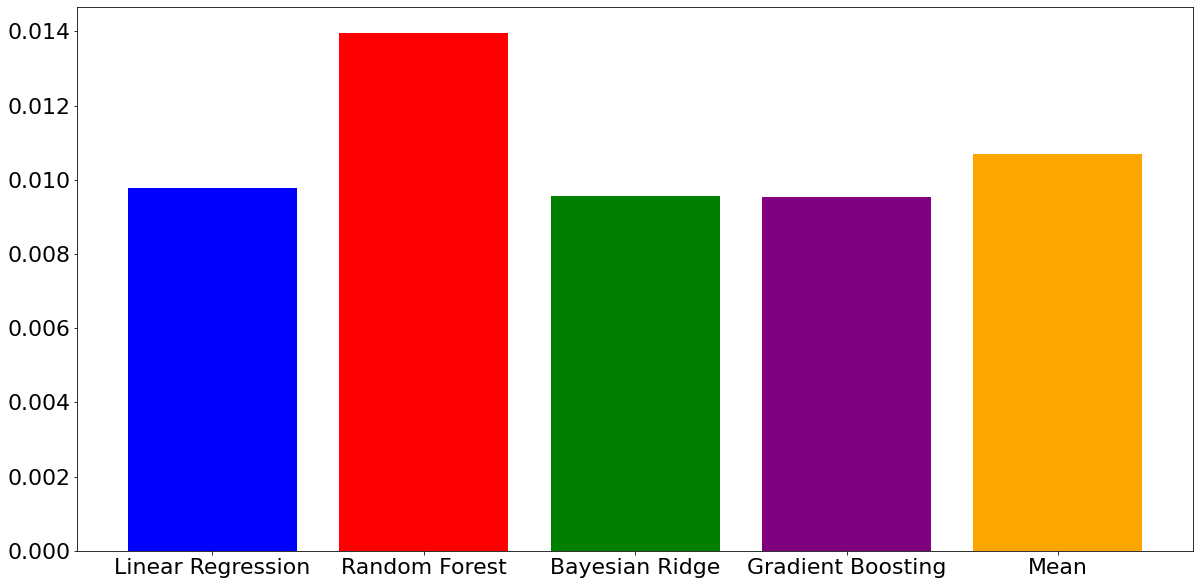

[*********************100%***********************]  1 of 1 completed


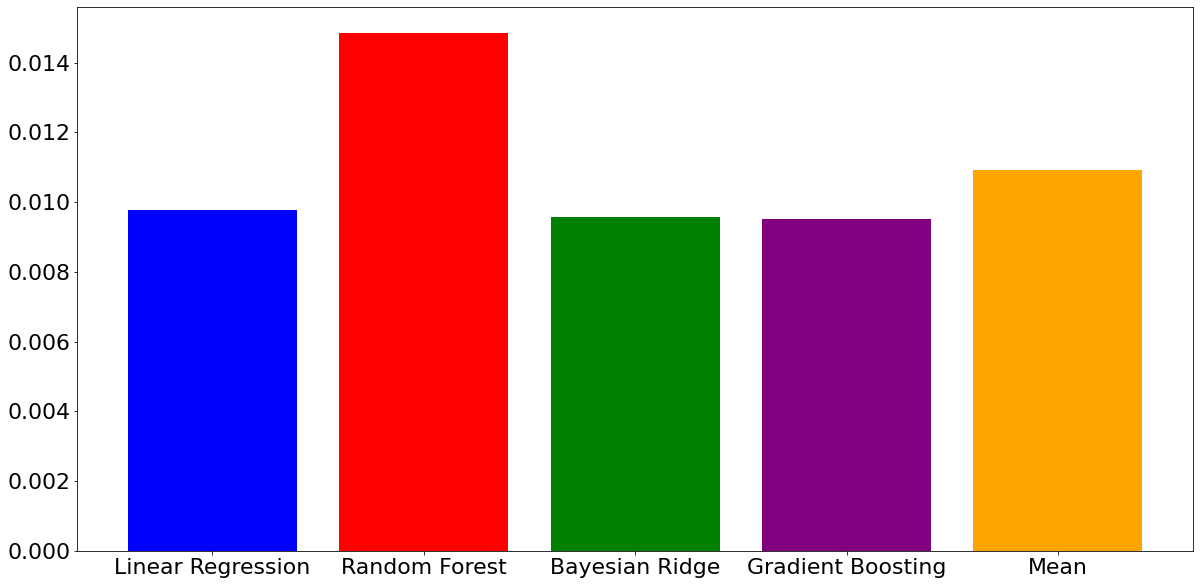

[*********************100%***********************]  1 of 1 completed


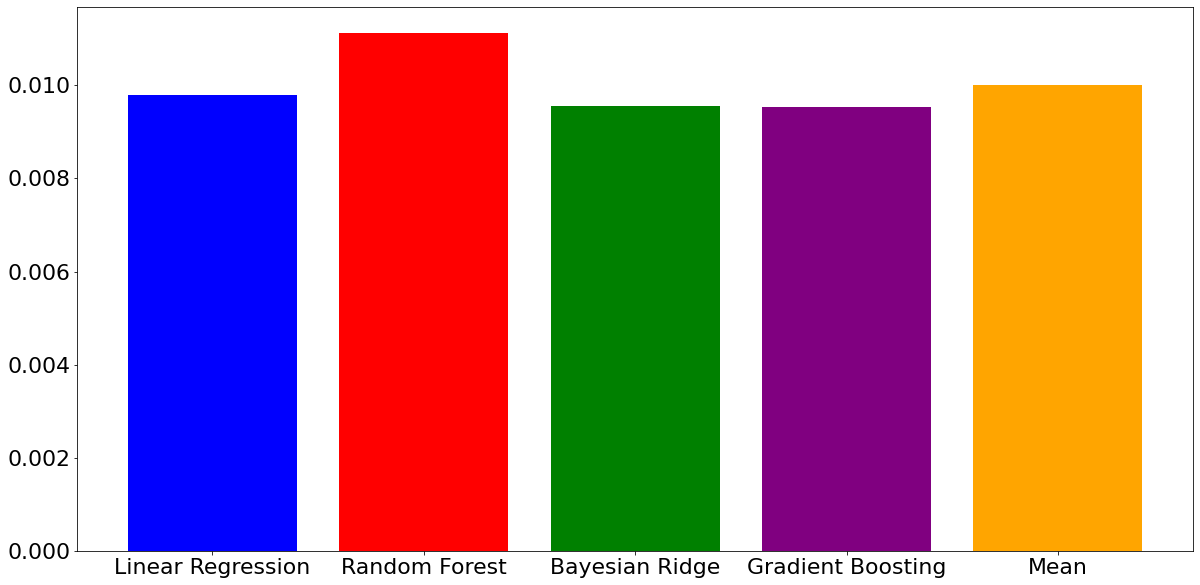

[*********************100%***********************]  1 of 1 completed


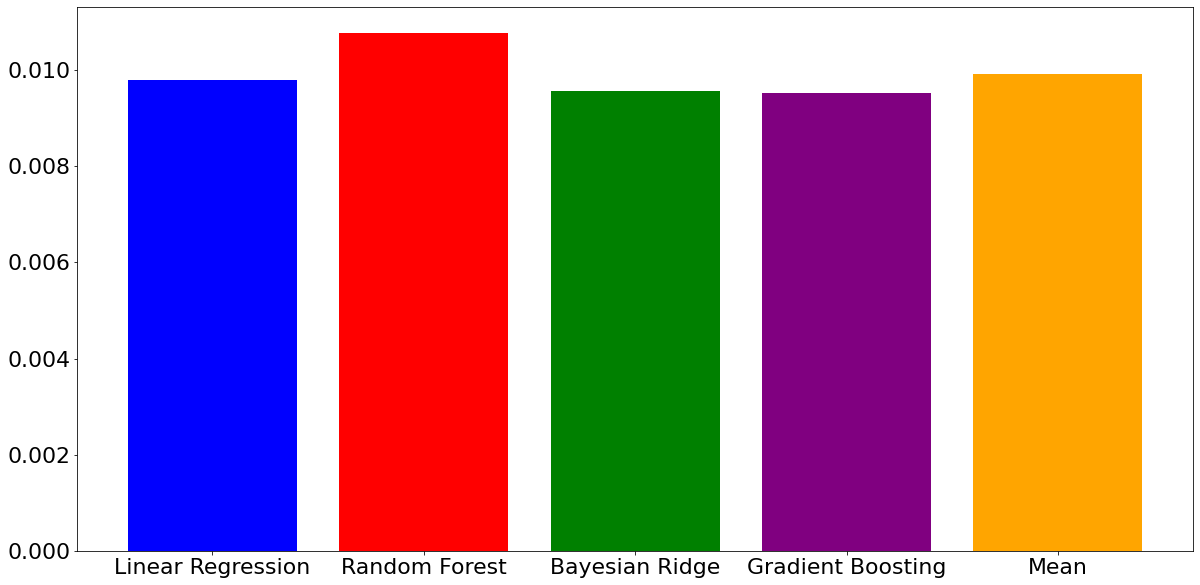

[*********************100%***********************]  1 of 1 completed


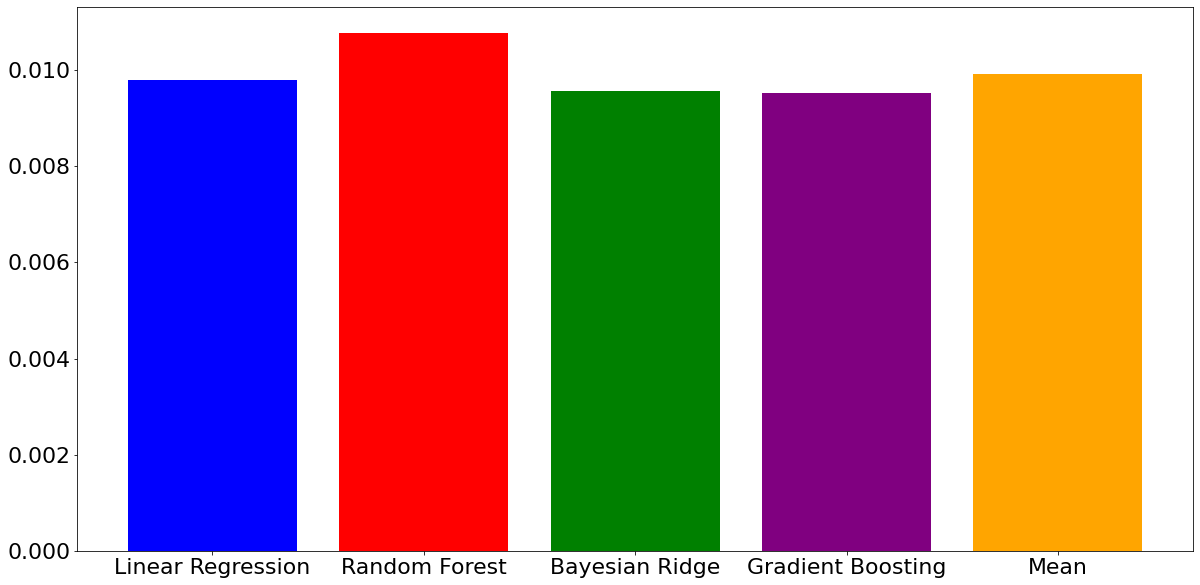

KeyboardInterrupt: 

In [254]:
import numpy as np
import yfinance
from matplotlib import pyplot as plt

class StockListener(StreamListener):
    def on_connect(self):
        print("Connected to Twitter API.")
        
    def on_data(self, data):
        
        all_data = json.loads(data)
        tweet = all_data['text']
        
        sid = SentimentIntensityAnalyzer()
        sentiment.append(sid.polarity_scores(tweet)['compound'])
        mean_sentiment = np.mean(sentiment)

        lr_pred =  lr.predict(np.array(mean_sentiment).reshape(-1, 1))[0]
        rf_pred = forest_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0]
        br_pred = br_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0]
        gb_pred = gb_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0]
        mean_pred =  np.mean([lr.predict(np.array(mean_sentiment).reshape(-1, 1))[0], 
                                           forest_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0], 
                                           br_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0], 
                                           gb_rgr.predict(np.array(mean_sentiment).reshape(-1, 1))[0]])
        
        
        live_stream = yfinance.download(tickers=user_stock, period='1d', interval='1m')
        first_open = live_stream['Open'][0]
        last_close = live_stream['Close'][-1]
        
        open_change = (last_close - first_open)/first_open
        
        plt.rcParams.update({'font.size':22})
        plt.figure(figsize=(20, 10))
        X = ['Linear Regression', 'Random Forest', 'Bayesian Ridge', 'Gradient Boosting', 'Mean']
        y = [lr_pred - open_change, rf_pred - open_change, br_pred - open_change, gb_pred - open_change, mean_pred - open_change]
        
        plt.bar(X, y, color=['blue', 'red', 'green', 'purple', 'orange'])
        
        return plt.show()
      
stream = tweepy.Stream(auth, StockListener())
stream.filter(track=[user_stock])



In [214]:
# data_tweet = fetch_tweet_stream('SELECT Tweet_Id, Tweet, Stock FROM TwitterTweet;')
# df_tweet = pd.DataFrame(columns=['Tweet_Id', 'Tweet', 'Stock'])

# for data in data_tweet:
#     index = len(df_tweet)
#     df_tweet.loc[index, 'TweetId'] = data[0]
#     df_tweet.loc[index, 'Tweet'] = data[1]
#     df_tweet.loc[index, 'Stock'] = data[2]

# df_tweet.head()

,Tweet_Id,Tweet,Stock


In [221]:
start_time = '2020-09-09'
end_time = '2021-11-21'
periods = 30

y_ticker = yfinance.Ticker(user_stock)
close = y_ticker.history(start=start_time, end=end_time, interval='1d')['Close']

close_df = pd.DataFrame(close, columns=['Close'])
close_df = close_df.reset_index()

from fbprophet import Prophet

close_df.columns = ['ds', 'y']

m = Prophet()
m.fit(close_df)
future = m.make_future_dataframe(periods=periods)
forecast = m.predict(future)

from fbprophet.plot import plot_plotly

plot_plotly(m, forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
